<a href="https://colab.research.google.com/github/SarahFSBorges/data.science/blob/main/Regress%C3%A3o_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Esse exercício foi realizado com base no material do Curso **Data Science na Prática 3.0** do SIGMOIDAL.
---

# Regressão com PyCaret - House Dataset

<p align="center"><img src="https://images.unsplash.com/photo-1616113364365-b6013f3dad25?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1050&q=80" width="60%"></p>

PyCaret é uma biblioteca *open-source* e *low-code* de Python que tem como objetivo reduzir o tempo entre o ciclo entre uma hipótese e insights em experimentos com Machine Learning.
Basicamente, o PyCaret é um pacote low-code que engloba diversas bibliotecas e frameworks de Machine Learning como scikit-learn, XGBoost, Microsoft LightGBM, spaCy e muito mais. 


https://pycaret.org/get-data/

https://pycaret.gitbook.io/docs/

## Instalando o PyCaret

Por padrão, o PyCaret não faz parte do conjunto de bibliotecas pré-instaladas do Google Colab. 

In [ ]:
# instalando pacotes
!pip install pycaret -q

Além disso, precisamos ativar o modo do Colab para utilizar as bibliotecas.

In [ ]:
# configurando para o Colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


## Coletando os Dados

O PyCaret possui data sets e uma forma própria de carregar esses dados. 

Você pode acessar a lista completa [aqui](https://pycaret.org/get-data/)

Para esse projeto de regressão, utilizo o conjunto `house`, com dados sobre preço de venda de imóveis.

In [ ]:
# importando os dados
from pycaret.datasets import get_data
data = get_data('traffic') #foi utilizado dados de tráfego, modelo de regressão multivariável (traffic_volume, 48204, 8)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Rush Hour,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,1,5545
1,None,289.36,0.0,0.0,75,Clouds,0,4516
2,None,289.58,0.0,0.0,90,Clouds,0,4767
3,None,290.13,0.0,0.0,90,Clouds,0,5026
4,None,291.14,0.0,0.0,75,Clouds,0,4918


In [ ]:
# verificando o formato dos conjunto
data.shape

(48204, 8)

In [ ]:
# verificar formato do conjunto
data.shape

(48204, 8)

Lembrando que os dados de teste não podem ser usados para **treinar** o modelo. Quando estivermos com nosso modelo pronto, aí sim, utiliza-se o modelo de teste para fazer previsões.

In [ ]:
# separar dados em teste e treino
test = data.sample(frac=0.10)
train = data.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [ ]:
# verificar formato dos conjuntos
print(train.shape)
print(test.shape)

(43384, 8)
(4820, 8)


### Configurando o ambiente no PyCaret
Seguindo as boas práticas para desenvolvimento, vamos importar somente os módulos que vamos precisar, ao invés de importar a biblioteca inteira para utilizar meia dúzia de módulos.

In [ ]:
# importar pacotes
from pycaret.regression import setup, compare_models, models, create_model, predict_model
from pycaret.regression import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.regression import save_model, load_model

Agora, vamos passar os nossos dados para o PyCaret, para começarmos a explorar os dados e preparar nosso modelo.

Aqui, vamos criar um regressor (reg), e vamos passar os dados, e a variável alvo.

In [ ]:
data.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'Rush Hour', 'traffic_volume'],
      dtype='object')

In [ ]:
# criar setup do Pycaret
reg = setup(data=train, target='traffic_volume')


,Description,Value
0,session_id,1857
1,Target,traffic_volume
2,Original Data,"(43384, 8)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(30368, 28)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='traffic_volume',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_s...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

### Criando um Pipeline
Através do setup, é onde vamos passar cada etapa do nosso pipeline. 

Dessa forma, iremos facilitar nosso trabalho, além de já estarmos preparando esse pipeline para uso em deploy, por exemplo.

In [ ]:
# criar pipeline
reg = setup(data = data,
            target = 'traffic_volume',
            normalize = True,
            log_experiment = True,
            experiment_name = 'traffic_volume_01')



,Description,Value
0,session_id,5161
1,Target,traffic_volume
2,Original Data,"(48204, 8)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(33742, 28)"


INFO:logs:Logging experiment in MLFlow
2022/12/29 20:57:31 INFO mlflow.tracking.fluent: Experiment with name 'traffic_volume_01' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='traffic_volume',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                     

## Comparando Modelos

Comparar todos os modelos para avaliar a performance é um ponto inicial recomendado pelos desenvolvedores do PyCaret.

Essa função treina todos os modelos na biblioteca do PyCaret e os avalia usando validação cruzada. Para a avaliação, a função imprime uma tabela que mostra a média do MAE, MSE, RMSE, R2, RMSLE e MAPE através dos folds (10 por padrão) de todos os modelos disponíveis na biblioteca.

* MAE - Mean Absolute Error mostra a média de erro em valores absolutos.
* MSE - Mean Squared Error, Erro Quadrático Médio
* RMSE - Root Mean Squared Error, Raiz do Erro Quadrático Médio
* R2 - Coefficient of Determination R2 Score
* RMSLE - Root Mean Squared Log Error
* MAPE - Mean Absolute Percentage Error mostra a média do erro absoluto em valores percentuais.

In [ ]:
# comparando os melhores modelos 
best = compare_models()
# resultado revela que o melhor modelo é o lightgbm, nos seguintes parâmetros.

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1501.0397,3.080834e+06,1755.2016,0.2177,0.9296,2.5541,0.300
gbr,Gradient Boosting Regressor,1531.0814,3.154603e+06,1776.0829,0.1989,0.9417,2.6234,2.234
ada,AdaBoost Regressor,1575.7938,3.284849e+06,1812.3881,0.1659,0.9722,2.7577,0.693
ridge,Ridge Regression,1592.5180,3.349613e+06,1830.1753,0.1494,0.9634,2.7351,0.021
br,Bayesian Ridge,1592.7156,3.349544e+06,1830.1567,0.1494,0.9632,2.7354,0.106
lr,Linear Regression,1592.5804,3.349962e+06,1830.2704,0.1493,0.9634,2.7353,0.426
lasso,Lasso Regression,1593.3666,3.350116e+06,1830.3134,0.1493,0.9637,2.7372,0.038
lar,Least Angle Regression,1592.5807,3.349964e+06,1830.2709,0.1493,0.9634,2.7353,0.043
huber,Huber Regressor,1590.0567,3.359650e+06,1832.9077,0.1469,0.9540,2.6920,0.986
par,Passive Aggressive Regressor,1592.5512,3.397753e+06,1843.2425,0.1372,0.9505,2.6829,0.173


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5161, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


Com duas simples palavras de código (nem mesmo uma linha) criamos mais de 22 modelos, usando 10 folds de validação cruzada e avaliamos os modelos com base nas 6 métricas de avaliação mais utilizadas (MAE, MSE, RMSE, R2, RMSLE e MAPE). 

A tabela de score impressa acima destaca os modelos com melhores resultados nas médias das métricas de avaliação para comparação. Por padrão, o grid é organizado a partir do R2 (Mais alto até o mais baixo), o que pode ser mudado passando o parâmetro sort.

Por exemplo, usando `compare_models(sort = 'RMSLE')` o grid será ordenado de acordo com o RMSLE (do menor para o maior, já que para essa métrica, um número menor é melhor).

Também é possível mudar o parâmetro dos folds para a validação cruzada do valor padrão, que é 10, para outro valor. Basta passar, por exemplo, `compare_models(fold = 5)` para que ele compare todos os modelos com uma validação cruzada com 5 folds. Reduzir o número de folds pode melhorar o tempo de execução do treinamento.

In [ ]:
# verificar melhor modelo
print(best)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5161, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
# verificar modelo
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## Instanciando o Modelo

Apesar do `compare_models()` ser uma função poderosa, e normalmente um excelente ponto de partida, não retorna modelos treinados. O *workflow* recomendado pelo PyCaret é usar o compare_models logo após o setup para avaliar os modelos que performam melhor com o conjunto de dados e selecionar alguns candidatos para seguir experimentando.

Dessa forma, a função permite que você crie modelos a partir da função `create_model()`. Essa função cria o modelo e o avalia usando uma *stratified cross validation*. Assim como o compare_models, o output é uma tabela de pontuação que mostra MAE, MSE, RMSE, R2, RMSLE e MAPE por fold.

Para esse conjunto especificamente, vamos focar em apenas um modelo, o ***Gradient Boosting Regressor***, ou GBR, para facilitar.

## Sobre o Gradient Boosting Regressor
<p align="center"><img src="http://uc-r.github.io/public/images/analytics/gbm/boosted-trees-process.png" width="60%"></p>

Gradient Boosting é uma das técnicas mais poderosas para construir modelos preditivos.

Nessa parte, vamos dar apenas uma intuição sobre esse tipo de modelo. Somente o que você precisa pare entender o motivo de escolhermos aqui.

Em termos muito básicos, Gradient Boosting envolve 3 elementos:

* Uma loss function para ser otimizada
* Um "Weak Learner" para fazer previsões
* Um modelo aditivo para adicionar aos Weak Learners para minimizar a loss function.

Basicamente, podemos dizer, em termos simples, que ele vai aprendendo com os erros e melhorando a cada passagem.

Com isso em mente, vamos em frente. Entraremos em mais detalhe sobre esse e outros tipos de modelo mais pra frente.

In [58]:
# instanciando o modelo
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1491.6650,3.061558e+06,1749.7309,0.2267,0.9371,2.0220
1,1491.8294,3.036492e+06,1742.5534,0.2247,0.9308,3.3997
2,1518.5469,3.156046e+06,1776.5265,0.1969,0.9379,2.2392
3,1509.3014,3.115620e+06,1765.1119,0.2074,0.9303,3.8242
4,1485.8386,3.046155e+06,1745.3239,0.2179,0.9211,1.7015
5,1504.8738,3.093201e+06,1758.7498,0.2116,0.9248,2.7273
6,1500.9245,3.073901e+06,1753.2545,0.2262,0.9168,1.8184
7,1500.8272,3.061461e+06,1749.7030,0.2212,0.9365,2.9923
8,1507.7833,3.109668e+06,1763.4250,0.2136,0.9312,3.0364


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 15
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5161, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


Repare que a média apresentada aqui é a mesma que vimos no compare_models anteriormente. Isso porque o modelo é criado e avaliado da mesma forma que fizemos anteriormente.

Assim como no compare_models, no create_model você pode mudar a quantidade de folds, passando o parâmetro `create_model('gbr', fold = 5)` para criar um GBR com validação cruzada com 5 folds.

In [62]:
#verificar pacotes
print(lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5161, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## Tuning do Modelo

Quando um modelo é criado usando o create_model() ele usa os hiperparâmetros padrão para cada modelo. Para fazer o tuning desses parâmetros, usamos a função tune_model().

Essa função faz o tuning dos parâmetros automaticamente, e mais uma vez o avalia com validação cruzada. O output é uma tabela de scores para MAE, MSE, RMSE, R2, RMSLE e MAPE por fold. 

OBS: A função tune_model() não recebe um objeto de modelo treinado como input. Ao invés disso, ela requer que o modelo passado seja uma string abreviada do modelo, como instanciamos anteriormente no create_model(). Todas as outras funções do pycaret.regression requerem um objeto de modelo treinado como argumento.

In [63]:
# tuning de parâmetros
tuned_lightgbm = tune_model(lightgbm, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1498.9947,3.084610e+06,1756.3057,0.2209,0.9380,2.0447
1,1498.0332,3.047814e+06,1745.7988,0.2218,0.9310,3.4239
2,1523.8438,3.176495e+06,1782.2725,0.1917,0.9371,2.2355
3,1517.3719,3.130317e+06,1769.2701,0.2037,0.9296,3.7443
4,1483.6702,3.039047e+06,1743.2864,0.2197,0.9209,1.7081
5,1506.3635,3.086785e+06,1756.9250,0.2132,0.9236,2.6607
6,1500.2434,3.062963e+06,1750.1323,0.2289,0.9158,1.8298
7,1504.8270,3.069636e+06,1752.0377,0.2191,0.9360,2.9624
8,1515.6684,3.125747e+06,1767.9783,0.2095,0.9335,3.1452


INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 17
INFO:logs:LGBMRegressor(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=1, min_child_weight=0.001, min_split_gain=0.3,
              n_estimators=90, n_jobs=-1, num_leaves=60, objective=None,
              random_state=5161, reg_alpha=0.7, reg_lambda=1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


O tune_model() é uma função que faz um random grid search dos hiperparâmetros. Por padrão, ela é configurada para otimizar o R2, mas isso pode ser modificado utilizando o parâmetro `optimize`.

Por exemplo: `tune_model('gbr', optimize = 'MAE')` vai retornar os parâmetros para ter o menor MAE possível (para MAE, quanto menor, melhor)

Para esse projeto especifico, deixaremos a métrica padrão, R2, em prol da simplicidade e facilidade dos fins educacionais. No mundo real, para saber qual a métrica ideal para o seu problema, é preciso ter um escopo melhor do problema, colaboração de outras pessoas envolvidas no projeto, para que seja feito de uma forma decisiva e não arbitrária.

Repare como a performance melhorou!

Métricas sozinhas não devem ser o único critério a ser avaliado ao finalizar o projeto e escolher o melhor modelo para produção. Outros fatores incluem tempo de treinamento, desvio padrão dos folds, entre outros.

Além disso, apesar de não terem sido melhores que o GBR com os parâmetros configurados no padrão, outros modelos, após o tuning, poderiam ter tido uma melhora maior, e superado o resultado obtido aqui.

O ideal seria testar por volta de 3 modelos, e ver como reagem. Por motivo de tempo e simplicidade no tratamento do problema, vamos nos manter com esse modelo.

In [64]:
# veriificando os parâmetros
print(tuned_lightgbm)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=1, min_child_weight=0.001, min_split_gain=0.3,
              n_estimators=90, n_jobs=-1, num_leaves=60, objective=None,
              random_state=5161, reg_alpha=0.7, reg_lambda=1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## Plotando Modelos

Antes de finalizar e salvar o modelo, nós podemos usar a função `plot_model()` para plotar visualizações sobre a performance do nosso modelo, como Residual Plots, Prediction Error, Feature Importance, etc.

Essa função recebe o modelo treinado como input e retorna um plot baseado no desempenho com o pedaço do conjunto de dados separado para teste.

Há mais de 10 plots diferentes disponíveis. Use a docstring da função para ver a lista de plots disponivel. Abaixo, vemos alguns bastante úteis.

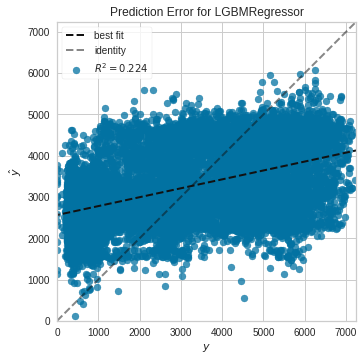

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [65]:
# plot matriz de confusão
plot_model(tuned_lightgbm, plot='error')

Outra visualização extremamente importante é a de `feature_importances`. Essa visualização basicamente nos mostra qual a importância de cada uma das variáveis para o resultado do modelo.

Em outras palavras, estamos medindo o poder preditivo de cada variável.

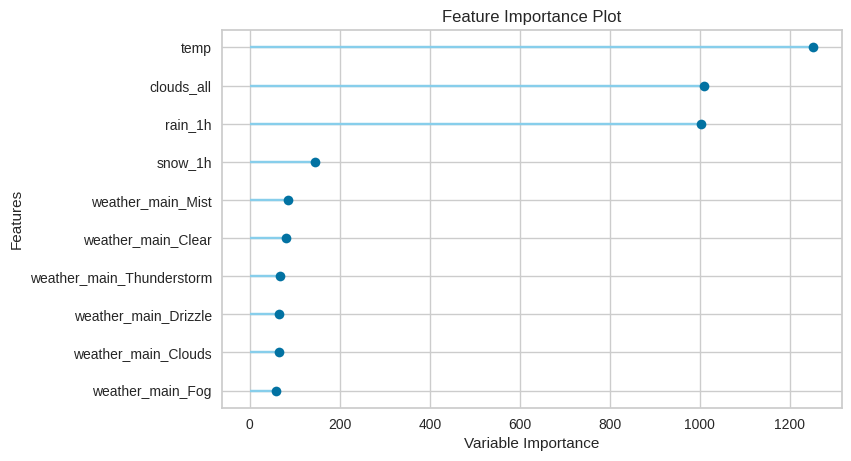

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [66]:
# ver as features mais interessantes
plot_model(tuned_lightgbm, plot='feature')

## Avaliação Interativa dos Modelos

Outra forma de analizar a performance dos modelos é usar a função `evaluate_model()`, que retorna uma interface para todos os plots disponíveis para cada modelo. Internamente, essa função usa a função que mostramos anteriormente, `plot_model()`.

In [67]:
# avaliar modelo
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMRegressor(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=1, min_child_weight=0.001, min_split_gain=0.3,
              n_estimators=90, n_jobs=-1, num_leaves=60, objective=None,
              random_state=5161, reg_alpha=0.7, reg_lambda=1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Fazendo Previsões

Antes de finalizar o modelo, é recomendável que se faça uma checagem final, fazendo previsões no conjunto de teste e revisando as métricas de avaliação.

O objetivo aqui é verificar a diferença de performance entre os resultados da validação cruzada e dos dados novos.

In [68]:
# fazer previsões
predict_model(tuned_lightgbm);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=1, min_child_weight=0.001, min_split_gain=0.3,
              n_estimators=90, n_jobs=-1, num_leaves=60, objective=None,
              random_state=5161, reg_alpha=0.7, reg_lambda=1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1504.8112,3.076962e+06,1754.1271,0.2243,0.9305,2.4123


O R2 no conjunto de teste ficou em 0.8421, comparado a 0.8148 na média da validação cruzada. Essa não é uma diferença significante.

Caso houvesse uma diferença significativa entre esses resultados, normalmente seria um indício de *over-fitting*, entre outros fatores que necessitariam maior investigação. Nesse caso, vamos seguir em frente para finalizar o modelo e fazer previsões em conjuntos ainda não vistos. (Os 10% que separamos no começo do projeto, nunca expostos ao PyCaret).


(DICA : É sempre bom se manter atento ao desvio padrão da validação cruzada na etapa da criação do modelo.)

## Finalizando o Modelo

Finalizar o modelo é o último passo do nosso projeto. Um workflow normal no PyCaret começa com o setup(), seguido do compare_models() para encontrarmos os melhores candidatos baseado nas métricas de avaliação de interesse, para então darmos seguimento com tunig de parâmetros, ensembling, stacking, etc.

Esse workflow eventualmente irá levá-lo ao melhor modelo para fazer previsões em dados ainda não vistos. A função `finalize_model()` dá o fit no modelo, incluindo o conjunto de teste separado dentro do PyCaret anteriormente (30% nesse caso).

O propósito disso é treinar o modelo no dataset completo antes de ser feito o deploy para produção.

In [72]:
# finalizar modelo
final_lightgbm = finalize_model(lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5161, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=51

Um aviso de cuidado. Uma vez que o modelo é finalizado usando a função `finalize_model()`, o dataset inteiro, incluindo a parte que havia sido separada anteriormente para teste, é usado para o treino.

Dessa forma, se o modelo for usado para fazer previsões no conjunto de teste separado pelo PyCaret depois da função finalize ter sido utilizada, os resultados serão enganosos, pois você estará fazendo previsões em dados já vistos pelo modelo.

Para demonstrar isso, vou usar o modelo finalizado com o `predict_model()` para comparar os resultados com os que tivemos na parte anterior.

In [73]:
# analisar a mudança nos resultados
predict_model(final_lightgbm);
# R2 subiu de 0.22 para 0.25, isso ocorre pois o modelo finalizado está sendo testado com dados que ele já utilizou, causando um over-fitting.

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5161, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1477.5332,2.968872e+06,1723.0416,0.2516,0.9187,2.3383


Repare que o R2 subiu de 0.8421 para 0.991, apesar do modelo ser o mesmo. Isso acontece pois o modelo finalizado está sendo testado com dados que ele já viu, causando over-fitting.

In [74]:
# verificar parâmetros
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5161, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## Prevendo em Dados Novos

A função `predict_model()` também é usada para prever em datasets nunca vistos antes. A única diferença é que para isso passaremos o parâmetro data.

Dessa forma, passaremos como data os dados que ainda não foram vistos pelo modelo, separados anteriormente, no começo do projeto.

Esse conjunto contém 10% do conjunto de dados original. Essa porção nunca foi exposta ao PyCaret, e é perfeita para simular novos dados reais que serão recebidos pelo modelo em produção.

In [75]:
# prever dados não vistos
unseen_predictions = predict_model(final_lightgbm, data=test)
unseen_predictions.head()
# É adicionado a coluna Label com o valor previsto pelo modelo BGR.

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5161, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1488.5298,3.025379e+06,1739.3618,0.2499,0.922,2.0685


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Rush Hour,traffic_volume,Label
0,None,289.35,0.0,0.0,75,Clouds,0,6103,3255.018283
1,None,292.60,0.0,0.0,75,Clouds,0,3945,3448.261017
2,None,291.40,0.0,0.0,1,Clear,0,561,2234.036916
3,None,298.15,0.0,0.0,1,Clear,0,5005,3795.062445
4,None,256.80,0.0,0.0,90,Snow,1,962,3669.747692


A coluna label é adicionada ao conjunto novo. O Label é o valor previsto pelo modelo GBR. Caso você prefira ter o valor arrendodado, também é possível passar round como parâmetro em predict_model().

## Salvando o Modelo

Agora que terminamos nosso trabalho com o modelo, é hora de se preocupar em como mantê-lo utilizável e pronto para fazer novas previsões em novos dados.

Com a função `save_model()` nós conseguimos salvar o nosso modelo treinado, pronto para uso. Dentro dele também está contido todo o pipeline de pré-processamento que foi utilizado. Basta passar o conjunto de dados para fazer as previsões.

In [76]:
# salvar modelo
save_model(final_lightgbm,'Modelo_Final_29_12_22')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5161, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), model_name=Modelo_Final_29_12_22, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='traffic_volume',
                                      time_f

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='traffic_volume',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min

DICA : É sempre bom usar datas nos nomes de arquivos de modelos ao salvar, para ajudar no controle de versionamento.

## Carregando um Modelo

Se salvar um modelo com PyCaret é simples, carregar o mesmo não poderia ser diferente.

Para isso, vamos utilizar o método `load_model`, passando como parâmetro o nome do arquivo do modelo.

In [78]:
# carregando um modelo salvo
saved_final_lightgbm = load_model('Modelo_Final_29_12_22')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Modelo_Final_29_12_22, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


Com o modelo carregado, é fácil fazer novas previsões com ele, assim como fizemos ao finalizar nosso modelo.

In [79]:
# previsões com o modelo salvo
new_prediction = predict_model(saved_final_lightgbm,data=test)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='traffic_volume',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_s...
                 LGBMRegressor(boosting_type='gbdt', class_weight=None,
                               colsample_bytree=1.0, importance_type='split',
                               learning_rate=0.1, max_depth=-1,


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1488.5298,3.025379e+06,1739.3618,0.2499,0.922,2.0685


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Rush Hour,traffic_volume,Label
0,None,289.35,0.0,0.0,75,Clouds,0,6103,3255.018283
1,None,292.60,0.0,0.0,75,Clouds,0,3945,3448.261017
2,None,291.40,0.0,0.0,1,Clear,0,561,2234.036916
3,None,298.15,0.0,0.0,1,Clear,0,5005,3795.062445
4,None,256.80,0.0,0.0,90,Snow,1,962,3669.747692
